## Upload data:

In [5]:
import re
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
import pandas as pd

In [2]:
!kaggle datasets download -d gpreda/covid19-tweets

Dataset URL: https://www.kaggle.com/datasets/gpreda/covid19-tweets
License(s): CC0-1.0
 93% 26.0M/27.9M [00:00<00:00, 137MB/s] 
100% 27.9M/27.9M [00:00<00:00, 130MB/s]


In [3]:
# prompt: save the data into a df variable (the data is a zip)

!unzip -o covid19-tweets.zip
data = pd.read_csv('covid19_tweets.csv')
data.head()

Archive:  covid19-tweets.zip
  inflating: covid19_tweets.csv      


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [4]:
data.isna().any()

user_name           False
user_location        True
user_description     True
user_created        False
user_followers      False
user_friends        False
user_favourites     False
user_verified       False
date                False
text                False
hashtags             True
source               True
is_retweet          False
dtype: bool

In [6]:
data.dropna(subset=['user_name', 'user_description', 'text'])

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did ...,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...,NaN,Twitter Web App,False
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


In [9]:
posts_threshold = int(data.groupby('user_name').user_created.count().quantile(0.9))
filtered_data = data.groupby('user_name').filter(lambda x: len(x) >= 10)
print(filtered_data.shape)

(41861, 13)


In [10]:
sample_ids = filtered_data['user_name'].unique()
np.random.seed(42)
np.random.shuffle(sample_ids)
sample_ids = sample_ids[:1000]
sample_data = filtered_data[filtered_data['user_name'].isin(sample_ids)]
sample_data = sample_data.reset_index(drop=True)
print(sample_data.shape)
sample_data.head()

(25943, 13)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DailyaddaaNews,New Delhi,Breaking news alerts from India.,2016-10-22 09:18:42,546,29,88,False,2020-07-25 12:26:46,Rajasthan Government today started a Plasma Ba...,NaN,Twitter Web App,False
1,APO Group English,#AFRICA #MENA,Latest #Africa & #MENA related #News releases ...,2011-02-22 09:09:45,10661,6,2037,True,2020-07-25 12:26:31,Coronavirus - South Africa: COVID-19 update fo...,NaN,Africa Newsroom,False
2,Micah Pollak,Northwest Indiana,Associate Professor of Economics (PhD in Econo...,2011-07-22 13:41:42,751,183,1308,False,2020-07-25 12:26:31,"@JimBnntt Your image doesn't list a source, bu...",NaN,Twitter Web App,False
3,TOI Delhi,"New Delhi, India",Your city. Your neighborhood. Your block. Cove...,2009-04-13 13:00:35,52186,41,74,True,2020-07-25 12:25:49,"#Delhi reports 1,142 #COVID19 positive cases a...","['Delhi', 'COVID19']",TweetDeck,False
4,APN NEWS,"A-009, SEC-68 , NOIDA",APN NEWS: खबर है तो दिखेगी… Follow us for brea...,2014-05-13 09:10:18,20262,14,1487,False,2020-07-25 12:25:35,Testing per 10 lakh population in Jammu and Ka...,NaN,Twitter Web App,False


## Doc2Vec on user_description:

In [17]:
from gensim.utils import simple_preprocess

sample_data.loc[:, 'tokenized'] = sample_data['user_description'].apply(
    lambda x: simple_preprocess(str(x)) if not pd.isna(x) else []
)

In [18]:
def user_vector(list_of_tokens, model):
    return sum(model.infer_vector(tokens) for tokens in list_of_tokens) / len(list_of_tokens)

In [19]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import nltk
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
nltk.download('punkt')

# Prepare documents
tagged_data = [TaggedDocument(words=text, tags=[str(i)]) for i, text in enumerate(sample_data['tokenized'])]

# Train Doc2Vec model
vector_size = 1000
model = Doc2Vec(vector_size=vector_size, window=3, min_count=10, workers=4, epochs=35)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [37]:
users_grouped = sample_data.groupby('user_name').agg({
    'tokenized': list,
    'user_location': 'first',
    'user_created': 'first',
    'user_followers': 'mean',
    'user_friends': 'mean',
    'user_favourites': 'mean',
    'user_verified': 'first',
    'text': lambda x: ' '.join(x),  # Concatenate all tweets
    'user_description': 'first'
}).reset_index()

# Calculate the vector after grouping
users_grouped['vector'] = users_grouped['tokenized'].apply(user_vector, args=(model,))

In [38]:
# users_grouped = sample_data.groupby('user_name').tokenized.apply(list).reset_index()

users_grouped['vector'] = users_grouped['tokenized'].apply(user_vector, args=(model, ))

In [39]:
doc2vec_similarity_matrix = cosine_similarity(list(users_grouped['vector']))

In [40]:
doc2vec_similarity_matrix

array([[1.0000001 , 0.6846616 , 0.24933079, ..., 0.8200626 , 0.6554205 ,
        0.8300459 ],
       [0.6846616 , 0.9999997 , 0.19618955, ..., 0.62378526, 0.4604632 ,
        0.63843393],
       [0.24933079, 0.19618955, 1.0000005 , ..., 0.20516956, 0.16751689,
        0.21114643],
       ...,
       [0.8200626 , 0.62378526, 0.20516956, ..., 1.0000004 , 0.61791533,
        0.830472  ],
       [0.6554205 , 0.4604632 , 0.16751689, ..., 0.61791533, 0.9999997 ,
        0.6699998 ],
       [0.8300459 , 0.63843393, 0.21114643, ..., 0.830472  , 0.6699998 ,
        1.0000002 ]], dtype=float32)

## Combining other features:

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from scipy.spatial.distance import cosine


# 1. Normalize numerical features
numerical_features = ['user_followers', 'user_friends', 'user_favourites']
scaler = StandardScaler()
normalized_numerical = scaler.fit_transform(users_grouped[numerical_features])

# 2. Encode categorical features
categorical_features = ['user_location', 'user_verified']
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_categorical = encoder.fit_transform(users_grouped[categorical_features])

# 3. Combine all features
# Convert 'user_created' to numerical (days since account creation)
users_grouped['days_since_creation'] = (pd.to_datetime('now') - pd.to_datetime(users_grouped['user_created'])).dt.days


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [43]:
# Combine Doc2Vec embeddings with other features
combined_features = np.hstack([
    np.vstack(users_grouped['vector'].values),  # Doc2Vec embeddings
    normalized_numerical,
    encoded_categorical,
    users_grouped['days_since_creation'].values.reshape(-1, 1)
])

## Similarity between users:

In [44]:
# 4. Recalculate similarity
def cosine_similarity_matrix(X):
    return 1 - np.array([[cosine(a, b) for b in X] for a in X])

combined_similarity_matrix = cosine_similarity_matrix(combined_features)


In [45]:
# Update the recommend_users function
def recommend_users(user_id, n=5):
    user_index = list(users_grouped['user_name']).index(user_id)
    similarities = combined_similarity_matrix[user_index]
    similar_indices = similarities.argsort()[-n-1:-1][::-1]
    similar_users = [list(users_grouped['user_name'])[i] for i in similar_indices]
    return [(user, similarities[i]) for i, user in zip(similar_indices, similar_users) if user != user_id]


In [46]:
# Example usage
example_user = users_grouped['user_name'].iloc[np.random.randint(users_grouped.shape[0])]
recommendations = recommend_users(example_user)
print(f"Top 5 recommended users for user {example_user}:")
for user, similarity in recommendations:
    print(f"User {user}: Similarity {similarity:.2f}")

Top 5 recommended users for user Rising Kashmir:
User BusinessMirror: Similarity 1.00
User ACEMAXX ANALYTICS: Similarity 1.00
User Cint Kortmann: Similarity 1.00
User pōhutukawa: Similarity 1.00
User Joshua Lukens: Similarity 1.00


In [47]:
for i in sample_data[sample_data['user_name'] == "Matthew Rimmer"]['user_description']:
    print(i)
    print('-'*30)

Professor of IP & Innovation Law #Copyright #Patent #Trademark #Access2meds #Plainpacks #SDGs #Climate #IndigenousIP #TPP #trade #robotics #3dprinting @QUT
------------------------------
Professor of IP & Innovation Law #Copyright #Patent #Trademark #Access2meds #Plainpacks #SDGs #Climate #IndigenousIP #TPP #trade #robotics #3dprinting @QUT
------------------------------
Professor of IP & Innovation Law #Copyright #Patent #Trademark #Access2meds #Plainpacks #SDGs #Climate #IndigenousIP #TPP #trade #robotics #3dprinting @QUT
------------------------------
Professor of IP & Innovation Law #Copyright #Patent #Trademark #Access2meds #Plainpacks #SDGs #Climate #IndigenousIP #TPP #trade #robotics #3dprinting @QUT
------------------------------
Professor of IP & Innovation Law #Copyright #Patent #Trademark #Access2meds #Plainpacks #SDGs #Climate #IndigenousIP #TPP #trade #robotics #3dprinting @QUT
------------------------------
Professor of IP & Innovation Law #Copyright #Patent #Trademark #A

In [48]:
sample_data[sample_data['user_name'] == 'The Warrior Factor'].iloc[0]['user_description']

'Defender of freedom, democracy & true equality. Hate: Nanny State, Hypocrites, Political Bigots. Love: Cycling (helmet-free), Melb Cup, Star Wars.'


## Visualization of Similarity w/ T-SNE:

In [49]:
features = pd.DataFrame(users_grouped['vector'].to_list(), columns=[f'x{i}' for i in range(vector_size)], index=users_grouped.index)

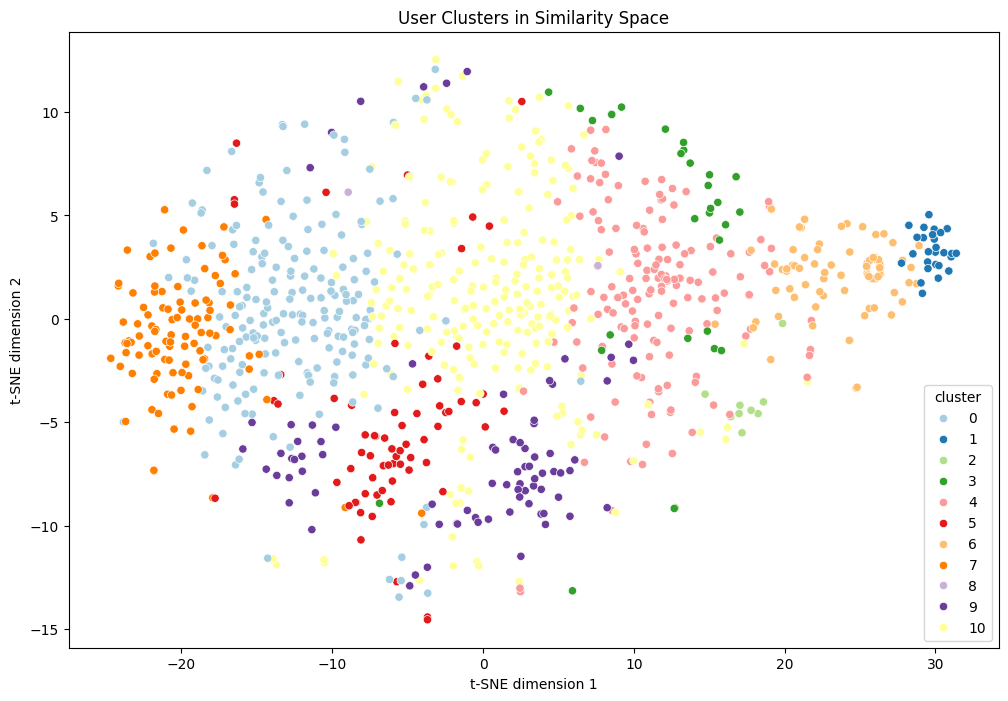

In [50]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy import sparse

# Perform K-means clustering
kmeans = KMeans(n_clusters=11, random_state=42, n_init=10)  # Added n_init to suppress warning
cluster_labels = kmeans.fit_predict(features)

# Perform t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
user_profile_2d = tsne.fit_transform(features)

# Create a DataFrame with the t-SNE results and cluster labels
viz_df = pd.DataFrame({
    'x': user_profile_2d[:, 0],
    'y': user_profile_2d[:, 1],
    'cluster': cluster_labels,
    'user_id': list(users_grouped['user_name'].to_numpy())
})

# Convert RGB tuples to hex codes
palette = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c',
           '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928']

plt.figure(figsize=(12, 8))
sns.scatterplot(data=viz_df, x='x', y='y', hue='cluster', palette=palette[:11], legend='full')
plt.title('User Clusters in Similarity Space')
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')

# Optionally, annotate points with user IDs
# for i, row in viz_df.iterrows():
#     plt.annotate(row['user_id'], (row['x'], row['y']), xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.7)

plt.show()

In [51]:
list(sns.color_palette())

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]